In [1]:
import pandas as pd
import requests
import bs4
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [10]:
url = 'https://www.predictit.org/Home/GetContractListAjax?marketId=1233'
res = requests.get(url)
soup = bs4.BeautifulSoup(res.text)
table = soup.find('tbody')
df_cand = pd.DataFrame([[j.find('a')['href'].split('=')[-1],j.find('h4').text] for j in table.findAll('tr')[1:]],columns=['ID','Name']).set_index('ID')
df_cand.index = [j.split('/')[2] for j in df_cand.index]

In [12]:
for t in df_cand.index:
    url = 'https://www.predictit.org/Home/GetChartPriceData?contractId={0}&timespan=24h&_=1442868407873'.format(t)
    res = requests.get(url)
    if t==df_cand.index[0]:
        df = pd.DataFrame(eval(res.text)).rename(columns={'PricePerShare':df_cand.ix[t].values[0]})
    else:
        df = df.merge(pd.DataFrame(eval(res.text)).rename(columns={'PricePerShare':df_cand.ix[t].values[0]}),on='Date')
df['Date'] = df.Date.apply(lambda x: pd.datetime.now() + pd.DateOffset(hours=int(x[:x.find('h')])))
df = df.set_index('Date')

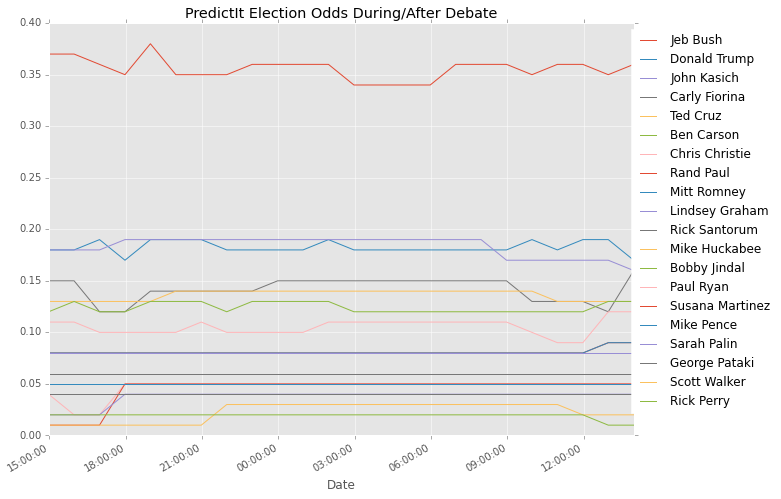

In [13]:
df.plot(figsize=(9,7),title='PredictIt Election Odds During/After Debate')
plt.legend(bbox_to_anchor=(1.25,1)).get_frame().set_facecolor('white')
# plt.axvspan(pd.Timestamp('2015-09-21 15:30:00'),pd.Timestamp('2015-09-21 23:00:00'), alpha=0.2, color='blue')
plt.tight_layout()